# This notebook shows how to run the hard-coded 2-step QPS circuits, from QuantumPartonShower_ReM_2step_hardcode.py

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
sys.path.append('../qiskit_legacy')
sys.path.append('../qiskit_code')

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import plotting as pl
import matplotlib

from PaperPlots import MakeObservables as mo

Number of emissions: 1
log(theta_max): -5.180816459236603
Number of emissions: 1
log(theta_max): -1.7269388197455342
Number of emissions: 2
log(theta_max): -1.7269388197455342
Number of emissions: 1
log(theta_max): -3.4538776394910684


In [3]:
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs

## Define parameters

In [4]:
eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000
N= 2

## Create circuits

In [5]:
qps0= qps_rhs.QuantumPartonShower(N, 1) # for g12= 0
qps1= qps_rhs.QuantumPartonShower(N, 1) # for g12= 1

qc0, qubits0= qps0.createCircuit(eps, g_1, g_2, 0, initialParticles)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

Applying step 1.
Apply uE()...
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.
Applying step 1.
Apply uE()...
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.


## Simulate circuits and store results

In [6]:
print('Qubits: ' + str(qc0.num_qubits))
print('Gates: ' + str(qc0.count_ops()))

t1= time.time()
counts0= qps0.simulate('qasm', shots=shots)
t2= time.time()
counts1= qps1.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 0: ' + str(t2-t1))
print('Time to simulate withg g12= 1: ' + str(t3-t2))

Qubits: 12
Gates: OrderedDict([('x', 20), ('cu3', 8), ('measure', 5), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])

Time to simulate withg g12= 0: 4.325892448425293
Time to simulate withg g12= 1: 7.410406827926636


## Some diagnostic plots

In [7]:
# Note: make sure the first counts parameters is g12=1, and the optional counts2 parameter is g12=0.

# # Plot the final particle configuration
# pl.bar_plot2(counts1, shots, eps, g_1, g_2, counts2= counts0, save=False, wReg=False)

# # Plot the number of emissions 
# pl.bar_plot_emissions(counts1, shots, eps, g_1, g_2, N, 1, counts2= counts0, save=False, wReg=False)

## Draw the circuit

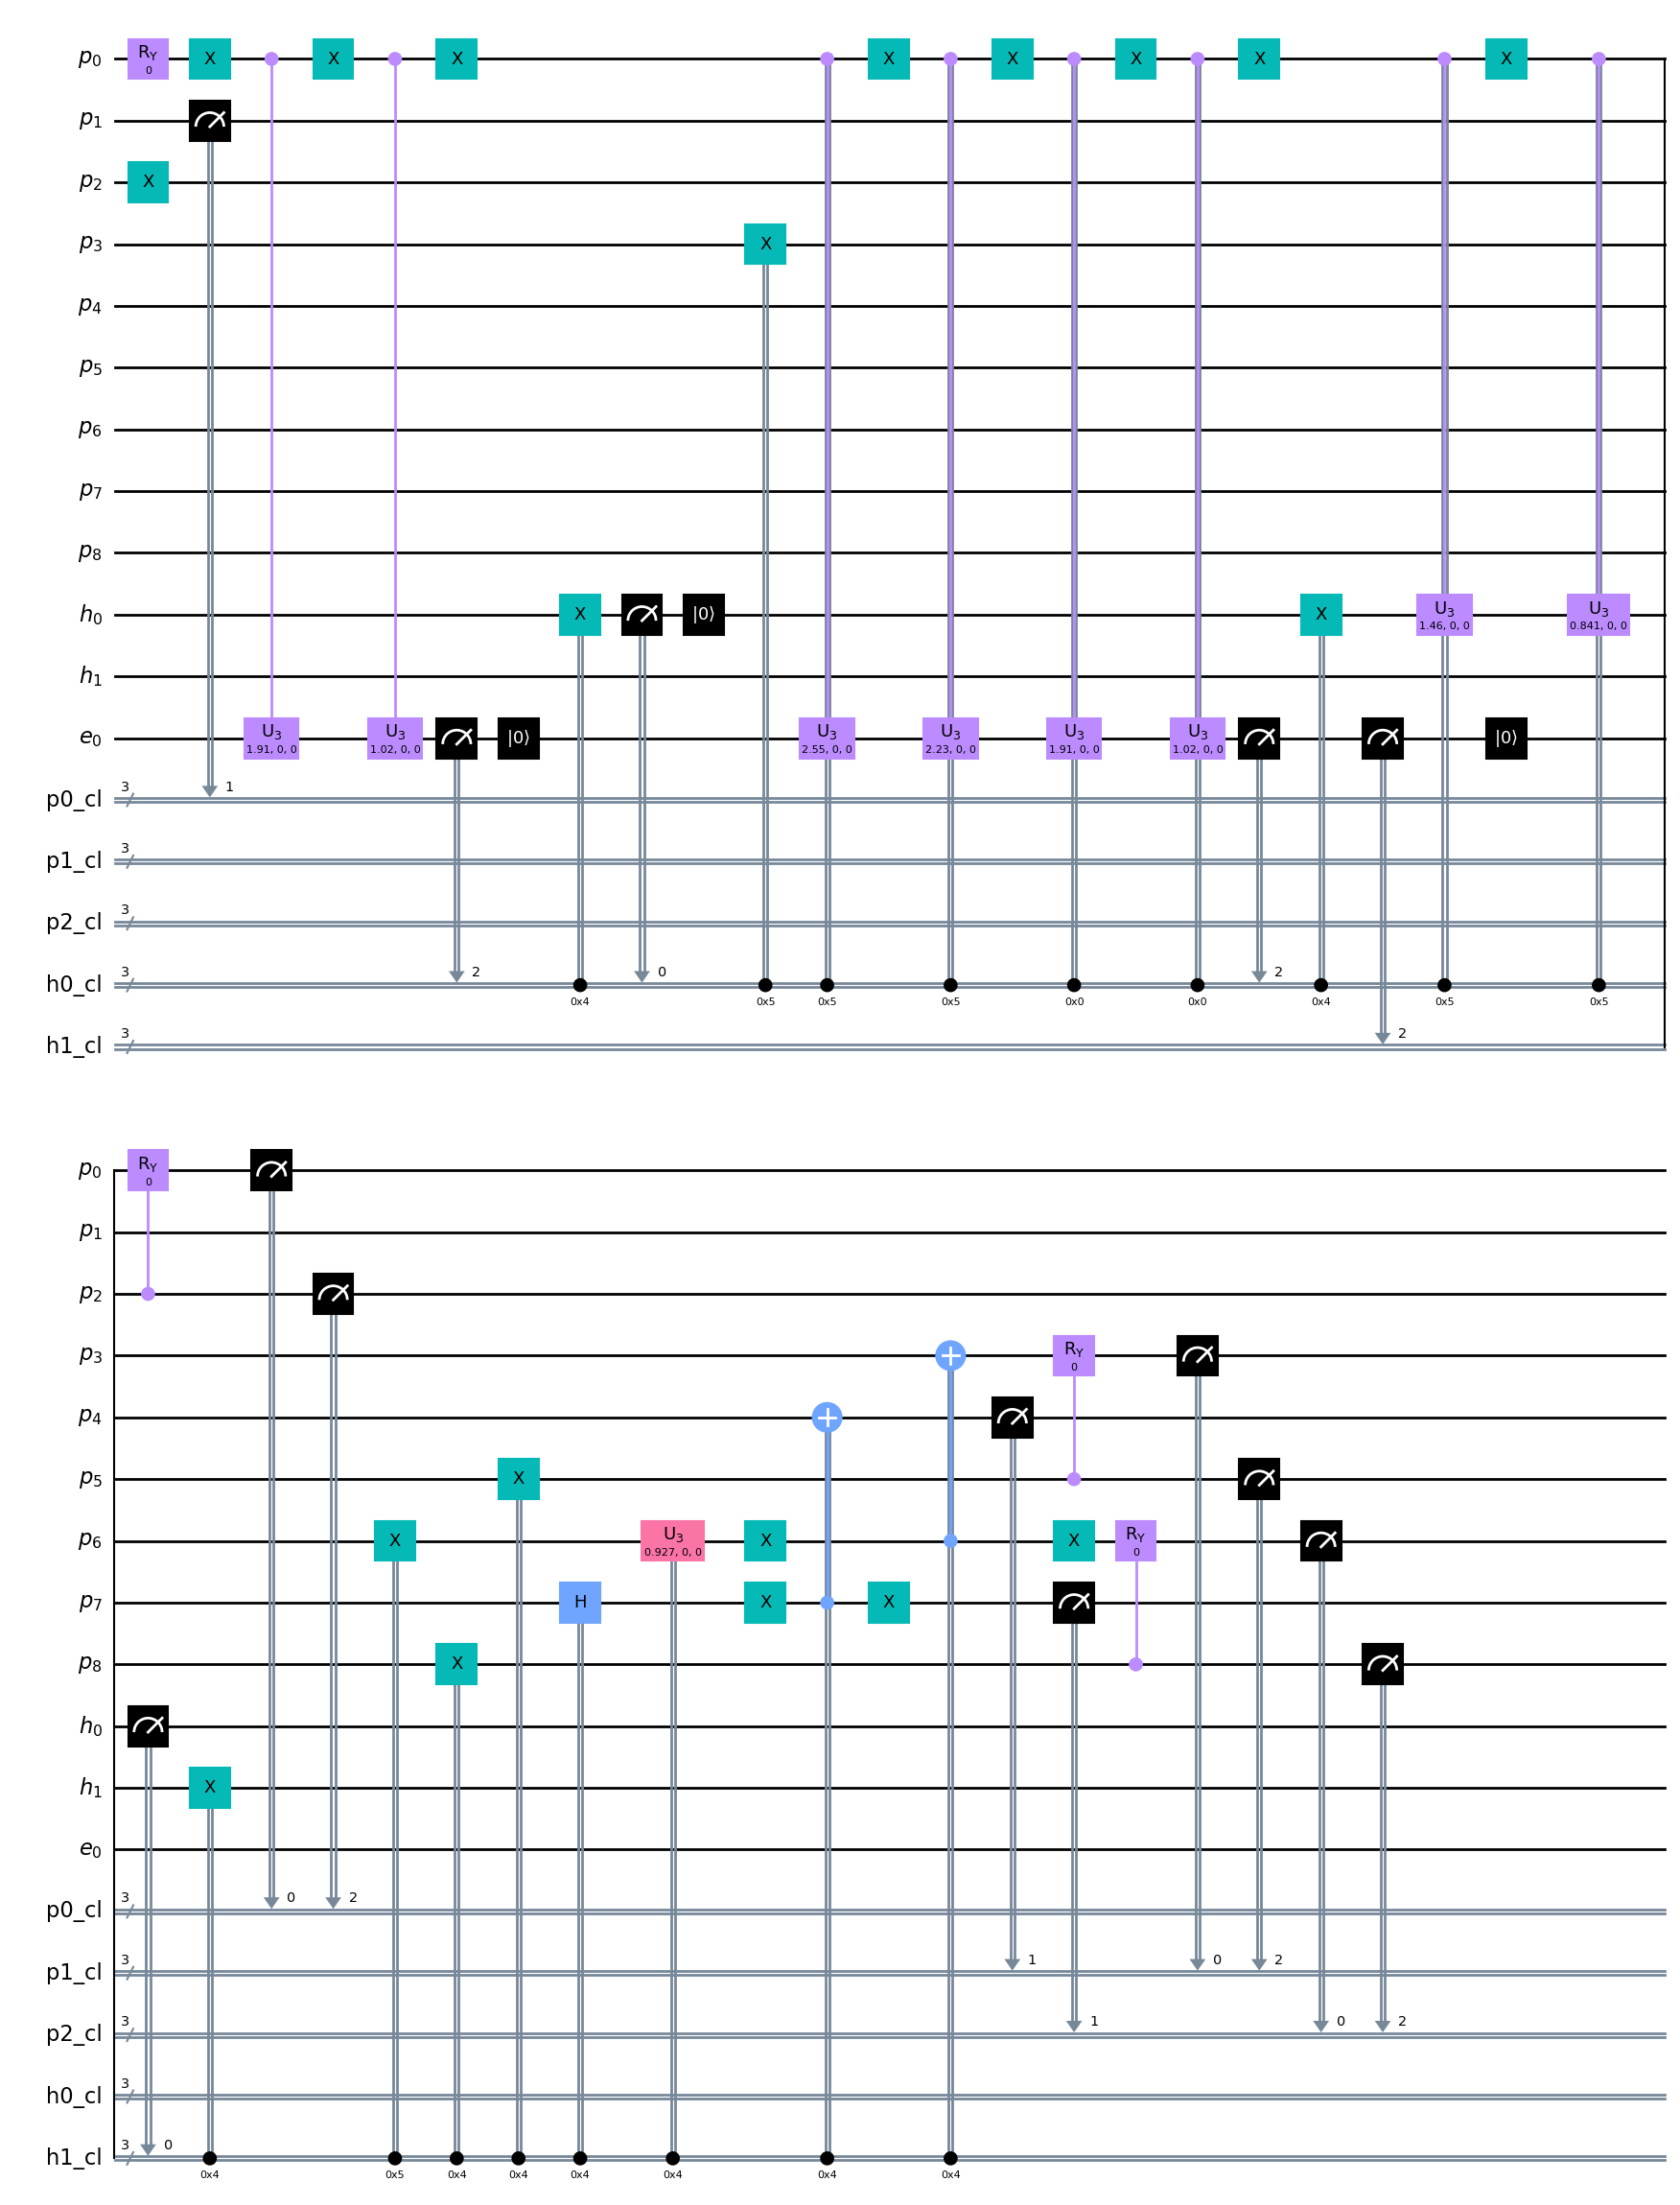

In [9]:
qc0.draw('mpl')